# HW 1

Sepehr Ilami

September 2025

## Question 1

## a

.csv:

This format is very simple and very well known. It's also readable by humans and works well as supplementary materials of a project/paper. Also, it's easy to import/export in Python and very easy to work with

.pkl:

This is a differnet format that is more efficient in terms of space and speed. It also keeps the object structure intact, which is useful for complex data types.

.gml:

It perfectly stores nodes and edges and their attributes all together in one file. It's specifically designed for graph data, making it a natural choice for this kind of work. It's also human readable.

ElasticSearch:

Very fast for searching, querying, and indexing huge datasets. It also supports complex queries, making it a powerful tool for data analysis. Great for attribute-based searches.

## b

Basically, each format's disadvantages are the advantages of the others. 

.csv:

while CSV files are simple and human-readable, they are not efficient for large datasets and do not preserve complex data structures, lacking schema or type information. Also, implementing multigraphs and hyperedges can be challenging due to the need for extra columns, and the graph structure is not explicit, requiring additional processing to reconstruct the graph.

.pkl:

I think it's only used with Python, so it's not very portable. Also, it's not human-readable, which can make debugging and manual inspection difficult. Additionally, security concerns arise when unpickling data from untrusted sources, as it can execute arbitrary code.

.gml:

While GML is human-readable and specifically designed for graph data, it can become complicated for very large graphs due to its text-based nature, leading to larger file sizes and slower parsing times. Additionally, GML may not support all complex graph structures natively, such as multigraphs or hyperedges, requiring workarounds. It's main problem though is its parse time and file size for large graphs.

ElasticSearch:

ElasticSearch is not a file format but a search engine, which means it requires setting up and maintaining a server, adding complexity compared to simple file formats. It is probably overkill for small datasets or simple graph structures, and its performance can degrade with very large datasets if not properly managed. You should simulate a graph with queries, which is not as straightforward as using a dedicated graph format.

## c

I believe that .pkl files are the ones that pose a security risk. This is because they can execute arbitrary code during the unpickling process, which can be exploited if the data comes from an untrusted source. This makes them potentially dangerous if not handled carefully.

Imagine you receive a package from someone you don't know. If the package contains a simple letter (like a .csv file), you can easily read it without any worries. But if the package contains a complex gadget (like a .pkl file), It could be very dangerous. The pickle can serialize and deserialize not just data, but also executable code in the form of bytecode. So when you unpickle data, you are basically asking the Python interpreter to execute a stream of instructions, including functions, classes, etc. An attacker can use this functionality to create a payload that performs malicious actions upon deserialization. For example, they could craft a pickle that, when unpickled, deletes files, steals data, or opens a backdoor on your system. This is why it's crucial to only unpickle data from trusted sources. 



## d

Ok so, when each of these formats are ideal to use?

**CSV** is sharable, readable, simple, and easy to use, making it great for small to medium datasets. It's particularly useful when you want to share data with others or include it as supplementary material in a publication. You can easily attach an edge list along with a node table (attributes), and you're done. Additionally, CSV is excellent for quick prototyping and analysis, especially when working with tabular data.

**Pickle** is optimal for Python-only workflows, especially when you run an expensive pipeline to compute centralities or communities on a NetworkX graph. It allows you to checkpoint the enriched graph for quick reloads the next day. Its one-line save/load feature preserves all Python attributes exactly and is fast during development. However, it should not be shared externally, as it is best treated as a local cache artifact.

**GML** is ideal for preparing a graph with node and edge attributes that you want collaborators to open in tools like Gephi. It captures both structure and attributes in a single text file, making it human-inspectable and well-supported by various graph tools.

**Elasticsearch** awesome when analyzing massive, time-evolving interaction or telemetry graphs, such as billions of events (e.g., user-item clicks, login IP connections). It provides near-real-time filtering by time window and attributes, along with dashboards that spotlight emerging connections. Its distributed ingestion, fast aggregations, and powerful query Domain-specific Language (DSL) make it suitable for operational large-graph analytics.


## Question 2

## a

## b

## c

## d

## Question 3

## a

In [44]:
# implement betweenness centrality using Brandes' algorithm, and compare with networkx
import networkx as nx
import random
import time
from collections import defaultdict, deque
import numpy as np
import matplotlib.pyplot as plt

def generate_random_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

def all_shortest_paths(G, start, end):
    if start == end:
        return [[start]]
    
    # BFS to find shortest distances and parents
    distances = {start: 0}
    parents = defaultdict(list)
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        for neighbor in G.neighbors(vertex):
            if neighbor not in distances:
                distances[neighbor] = distances[vertex] + 1
                queue.append(neighbor)
                parents[neighbor].append(vertex)
            elif distances[neighbor] == distances[vertex] + 1:
                # Another shortest path to this neighbor
                parents[neighbor].append(vertex)
    
    if end not in distances:
        return []  # No path exists
    
    # Reconstruct all shortest paths
    def build_paths(node):
        if node == start:
            return [[start]]
        
        paths = []
        for parent in parents[node]:
            for path in build_paths(parent):
                paths.append(path + [node])
        return paths
    
    return build_paths(end)

def calc_betweenness_single_node(G, node):
    nodes = list(G.nodes())
    nodes.remove(node)
    betweenness = 0.0
    
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            s = nodes[i]
            t = nodes[j]
            paths = all_shortest_paths(G, s, t)
            if not paths:
                print(f'No path between {s} and {t}')
                continue
            count_paths_through_node = sum(1 for path in paths if node in path[1:-1])
            print(f'Paths between {s} and {t}: {paths}, count through {node}: {count_paths_through_node}')
            betweenness += count_paths_through_node / len(paths)
    
    return betweenness

num_nodes = 10  # Number of nodes in the random graph
num_edges = 40  # Number of edges in the random graph
# create a G using networkx
G = generate_random_graph(num_nodes, num_edges)
node = 2
print(f'node: {node}')
betweenness = calc_betweenness_single_node(G, node)
print(f'betweenness (custom): {betweenness}')


node: 2
Paths between 0 and 1: [[0, 1]], count through 2: 0
Paths between 0 and 3: [[0, 1, 3], [0, 4, 3], [0, 7, 3], [0, 8, 3], [0, 2, 3], [0, 5, 3], [0, 6, 3], [0, 9, 3]], count through 2: 1
Paths between 0 and 4: [[0, 4]], count through 2: 0
Paths between 0 and 5: [[0, 5]], count through 2: 0
Paths between 0 and 6: [[0, 6]], count through 2: 0
Paths between 0 and 7: [[0, 7]], count through 2: 0
Paths between 0 and 8: [[0, 8]], count through 2: 0
Paths between 0 and 9: [[0, 9]], count through 2: 0
Paths between 1 and 3: [[1, 3]], count through 2: 0
Paths between 1 and 4: [[1, 0, 4], [1, 6, 4], [1, 5, 4], [1, 9, 4], [1, 3, 4], [1, 2, 4]], count through 2: 1
Paths between 1 and 5: [[1, 5]], count through 2: 0
Paths between 1 and 6: [[1, 6]], count through 2: 0
Paths between 1 and 7: [[1, 0, 7], [1, 6, 7], [1, 9, 7], [1, 3, 7], [1, 8, 7], [1, 2, 7]], count through 2: 1
Paths between 1 and 8: [[1, 8]], count through 2: 0
Paths between 1 and 9: [[1, 9]], count through 2: 0
Paths between 3 

Custom implementation time (small graph): 0.104337 seconds
NetworkX implementation time (small graph): 0.000934 seconds
Difference in results (L2 norm) (small graph): 0.083113


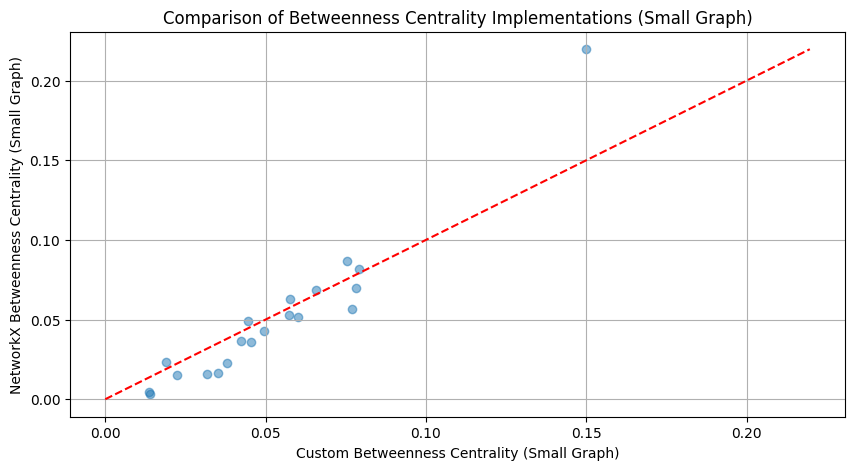

In [25]:

def betweenness_centrality_all_nodes(G):
    betweenness = {}
    for node in G.nodes():
        betweenness[node] = betweenness_calc_per_node(G, node)
    
    # Normalize the betweenness values
    scale = 1 / ((len(G) - 1) * (len(G) - 2)) if len(G) > 2 else None
    if scale is not None:
        for v in betweenness:
            betweenness[v] *= scale
    
    return betweenness

# geenrate a small random graph and compare our method with networkx
def generate_small_random_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

def compare_betweenness_small(num_nodes, num_edges):
    G = generate_small_random_graph(num_nodes, num_edges)
    
    start_time = time.time()
    custom_bc = betweenness_centrality_all_nodes(G)
    custom_time = time.time() - start_time
    
    start_time = time.time()
    nx_bc = nx.betweenness_centrality(G, normalized=True)
    nx_time = time.time() - start_time
    
    # Compare results
    custom_values = np.array([custom_bc[node] for node in G.nodes()])
    nx_values = np.array([nx_bc[node] for node in G.nodes()])
    
    difference = np.linalg.norm(custom_values - nx_values)
    
    print(f"Custom implementation time (small graph): {custom_time:.6f} seconds")
    print(f"NetworkX implementation time (small graph): {nx_time:.6f} seconds")
    print(f"Difference in results (L2 norm) (small graph): {difference:.6f}")
    
    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.scatter(custom_values, nx_values, alpha=0.5)
    plt.plot([0, max(custom_values.max(), nx_values.max())], [0, max(custom_values.max(), nx_values.max())], 'r--')
    plt.xlabel('Custom Betweenness Centrality (Small Graph)')
    plt.ylabel('NetworkX Betweenness Centrality (Small Graph)')
    plt.title('Comparison of Betweenness Centrality Implementations (Small Graph)')
    plt.grid(True)
    plt.show()

num_nodes_small = 20  # Number of nodes in the small random graph
num_edges_small = 50  # Number of edges in the small random graph
compare_betweenness_small(num_nodes_small, num_edges_small)

## b

In [26]:
def calc_betweenness_single_node(G, node):
    nodes = list(G.nodes())
    # check if node is in G.nodes
    if node not in nodes:
        raise ValueError(f"Node {node} not in graph")
    # if the graph is not a networkX object, raise an error
    if not isinstance(G, nx.Graph):
        raise ValueError("G must be a networkx Graph object")
    # check the graph connectivity
    if not nx.is_connected(G):
        raise ValueError("Graph must be connected")
    # if the number of edges are extremely low, raise a warning
    if G.number_of_edges() < 10:
        raise Warning("Graph is very sparse, results may be inaccurate")
    nodes.remove(node)
    betweenness = 0.0
    
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            s = nodes[i]
            t = nodes[j]
            paths = shortest_path(G, s, t)
            if len(paths) == 0:
                raise ValueError(f"No path between {s} and {t}; graph must be connected")
            if not paths:
                continue
            count_paths_through_node = sum(1 for path in paths if node in path[1:-1])
            betweenness += count_paths_through_node / len(paths)
    
    return betweenness

num_nodes = 10  # Number of nodes in the random graph
num_edges = 20  # Number of edges in the random graph
# create a G using networkx
G = generate_random_graph(num_nodes, num_edges)
node = 2
print(f'node: {node}')
betweenness = calc_betweenness_single_node(G, node)
print(f'betweenness (custom): {betweenness}')


node: 2
betweenness (custom): 9.983333333333333


## c

In [31]:
# compare with networkX

num_nodes = 10  # Number of nodes in the random graph
num_edges = 20  # Number of edges in the random graph
# create a G using networkx
G = generate_random_graph(num_nodes, num_edges)
node = 2
print(f'node: {node}')
betweenness = calc_betweenness_single_node(G, node)
networkx_betweenness = nx.betweenness_centrality(G, normalized=True)[node]

print(f'betweenness (custom): {betweenness}')
print(f'betweenness (networkx): {networkx_betweenness}')

node: 2
betweenness (custom): 6.3500000000000005
betweenness (networkx): 0.06481481481481481


## d

## Question 4

## a


I think this

## b

## c

## d

## Question 5

## a

## b

## c

## d

## Question 6

First of all, thank you for asking our opinions and comments about the course. This is highly valuable and I appreciate it a lot.
I think the course is well-structured and the content is very interesting. As a PhD student who works with Network Science tools, I believe this course gives me strong skills to work with networkx and get more comfortable with implementing network-related codes. 

I particularly like the hands-on approach we have during the sessions, but I think it would be better if, instead of just covering numerous concepts in this course, we focus on some specific topics and go deeper into them. In the last couple of sessions, I learned a lot about networkx, and more broadly, Python; However, with this fast pace it's not very likely for me to keep all those new functions, tools, and concepts in mind, when I really need them.

And this is the comment of a person who is already familiar with coding and Python (but no networkx background). I think for students who are new to coding, it might be even more challenging to keep up with the pace of the course.

There is also another way that comes to my mind about how we can improve the course. I think it would be great if each student can pick a specific topic in network science that they are interested in, and defines a project around that topic. and as we go into the course (more lecture-based) that you talk about different concepts, and going over their implementations in networkx (less detailed than current verison), we can apply those concepts to our projects. Then, students can have 3-4 pitch sessions during the semester to share their progress and get feedback from you and other students.

This way, students can learn the concepts better and also have an ongoing project for the entire semester that keeps them engaged with course materials and motivated to learn more and apply new tools and concepts to their projects as they go over the course.